## Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA

## Importing dataset

In [ ]:
df = pd.read_csv("C:/Users/Sachin Tripathi/Downloads/international-airline-passengers.csv", header = None)
df.head()

,0,1
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.columns = ['year', 'passengers']
df.head()

,year,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Converting year col into datetime and setting it as an index col

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
year          144 non-null object
passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df['year'] = pd.to_datetime(df['year'], format = "%Y-%m")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
year          144 non-null datetime64[ns]
passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [ ]:
cd = df.set_index('year')
cd.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='year', length=144, freq=None)

In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
cd.isnull().sum()

passengers    0
dtype: int64

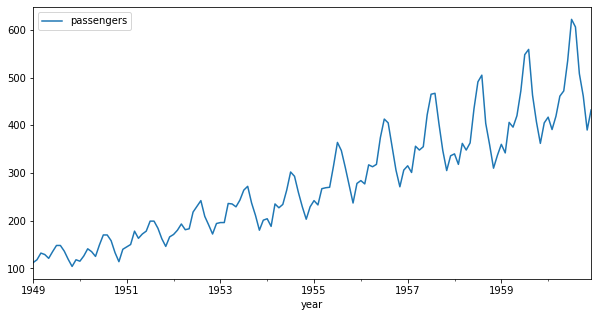

In [ ]:
cd.plot(figsize = (10, 5))

## Decomposition of the series

__Decomposing using statsmodel:__
- We can use statsmodels to perform a decomposition of this time series. 
- The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. 
- With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

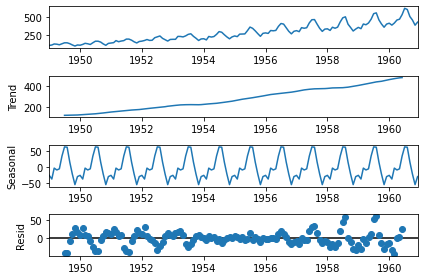

In [ ]:
out_put1 = seasonal_decompose(cd, model = 'additive')
out_put1.plot()
plt.show()

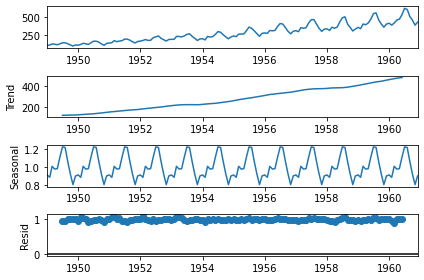

In [ ]:
out_put2 = seasonal_decompose(cd, model = 'multiplicative')
out_put2.plot()
plt.show()

## Stationarity
- A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time.
- Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.
- Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. 
- Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

### Augmented Dickey-Fuller Test
- The intuition behind the test is that if the series is integrated then the lagged level of the series y(t-1)  will provide no relevant information in predicting the change in y(t).
- Null hypothesis: The time series is not stationary
- Rejecting the null hypothesis (i.e. a very low p-value) will indicate staionarity

In [ ]:
adf_test = adfuller(cd['passengers'])
print("ADF-Test Results: ")
print("===========================")
adf_output = pd.Series(adf_test[0:2], index = ['test statistic', 'p-value'])
for i, v in adf_test[4].items():
    adf_output['Critical value (%s)' %i] = v
print(adf_output)
print("===========================")

ADF-Test Results: 
test statistic          0.815369
p-value                 0.991880
Critical value (1%)    -3.481682
Critical value (5%)    -2.884042
Critical value (10%)   -2.578770
dtype: float64


### Checking stationarity via constant mean and standard deviation concept

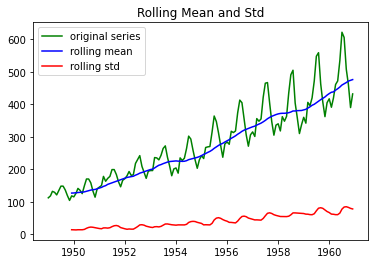

In [ ]:
r_mean = cd.rolling(12).mean()
r_std = cd.rolling(12).std()

original = plt.plot(cd, color = 'green', label = 'original series')
mean = plt.plot(r_mean, color = 'blue', label = 'rolling mean')
std = plt.plot(r_std, color = 'red', label = 'rolling std')
plt.title("Rolling Mean and Std")
plt.legend(loc = 'best')
plt.show()

### ADF Test & Rolling Mean/Std shows that the series is not stationary, we will convert the series into a stationary one now

In [ ]:
import numpy
cd_log = numpy.log(cd)

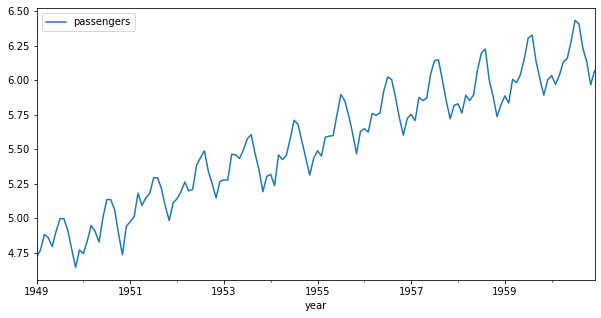

In [ ]:
cd_log.plot(figsize = (10, 5))

In [ ]:
cd_log.head()

,passengers
year,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


#### Differencing
- In this technique, we take the difference of the observation at a particular instant with that at the previous instant. 
- First order differencing in Pandas

In [ ]:
cd_log_diff = cd_log['passengers'] - cd_log['passengers'].shift()
cd_log_diff.head()

year
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
Name: passengers, dtype: float64

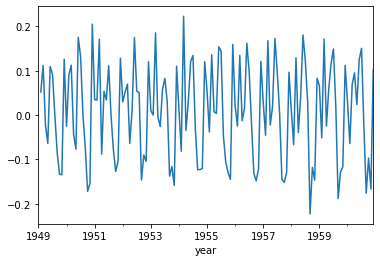

In [ ]:
cd_log_diff.plot()

### Impute the missing values to get the ADF Test output

In [ ]:
cd_log_diff.dropna(inplace=True)
adf_test = adfuller(cd_log_diff)
print("ADF-Test Results: ")
print("===========================")
adf_output = pd.Series(adf_test[0:2], index = ['test statistic', 'p-value'])
for i, v in adf_test[4].items():
    adf_output['Critical value (%s)' %i] = v
print(adf_output)
print("===========================")

ADF-Test Results: 
test statistic         -2.717131
p-value                 0.071121
Critical value (1%)    -3.482501
Critical value (5%)    -2.884398
Critical value (10%)   -2.578960
dtype: float64


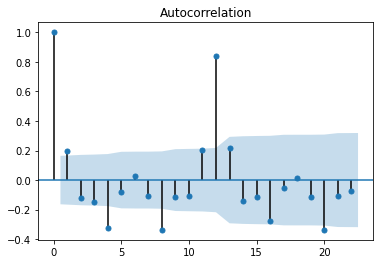

In [ ]:
plot_acf(cd_log_diff)
plt.show()

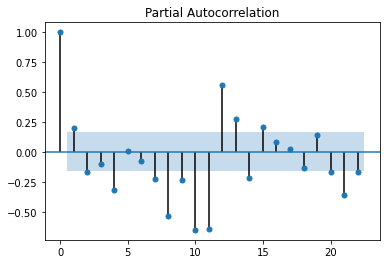

In [ ]:
plot_pacf(cd_log_diff)
plt.show()

## Autoregression (AR)
- The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.
- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
model = AR(cd_log_diff)
model_fit = model.fit()

C:\Users\Sachin Tripathi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECAT

Text(0.5, 1.0, 'RSS: 0.1945')

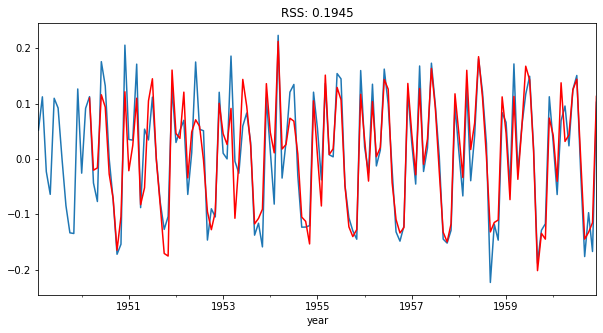

In [ ]:
import numpy as np
cd_log_diff.plot(figsize = (10, 5))
model_fit.fittedvalues.plot(figsize = (10, 5), color = 'red')
plt.title("RSS: %.4f"% np.nansum((model_fit.fittedvalues-cd_log_diff)**2))

## Moving Average (MA)

- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value. 


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(cd_log_diff, order = (0, 1))
model_fit = model.fit(disp = False)

C:\Users\Sachin Tripathi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             passengers   No. Observations:                  143
Model:                     ARMA(0, 1)   Log Likelihood                 121.754
Method:                       css-mle   S.D. of innovations              0.103
Date:                Tue, 03 Nov 2020   AIC                           -237.507
Time:                        08:40:38   BIC                           -228.619
Sample:                    02-01-1949   HQIC                          -233.895
                         - 12-01-1960                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0097      0.011      0.887      0.375      -0.012       0.031
ma.L1.passengers     0.2722      0.095      2.873      0.004       0.086       0.458
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.6744           +0.0000j            3.6744            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 1.5245')

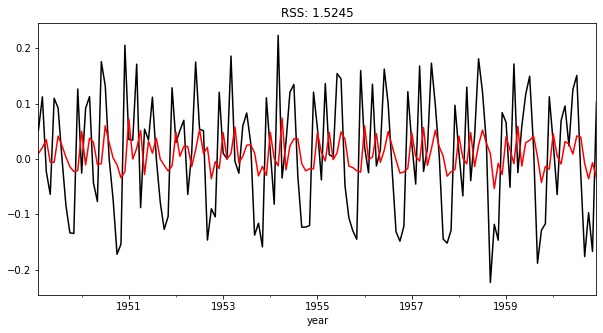

In [ ]:
cd_log_diff.plot(figsize = (10, 5), color = 'black')
model_fit.fittedvalues.plot(figsize = (10, 5), color = 'red')
plt.title("RSS: %.4f"% np.nansum((model_fit.fittedvalues-cd_log_diff)**2))

## Autoregressive Integrated Moving Average (ARIMA)
In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

- __Number of AR (Auto-Regressive) terms (p):__ p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
- __Number of Differences (d):__ d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.
- __Number of MA (Moving Average) terms (q):__ q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value. 


Note: A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle. ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

In [ ]:
t_s = cd.passengers - cd.passengers.shift()
t_s.dropna(inplace = True)
t_s.head()

year
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
Name: passengers, dtype: float64

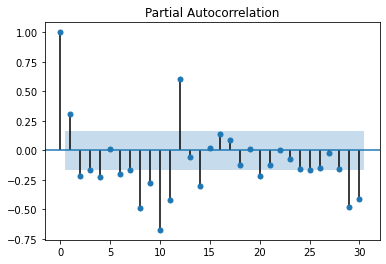

In [ ]:
plot_pacf(t_s, lags = 30)
plt.show()

## Interpreting ACF plots


ACF Shape	| Indicated Model |
-- | -- |
Exponential, decaying to zero |	Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model |
Alternating positive and negative, decaying to zero	Autoregressive model. |  Use the partial autocorrelation plot to help identify the order. |
One or more spikes, rest are essentially zero | Moving average model, order identified by where plot becomes zero. |
Decay, starting after a few lags |	Mixed autoregressive and moving average (ARMA) model. | 
All zero or close to zero | Data are essentially random. |
High values at fixed intervals | Include seasonal autoregressive term. |
No decay to zero |	Series is not stationary |

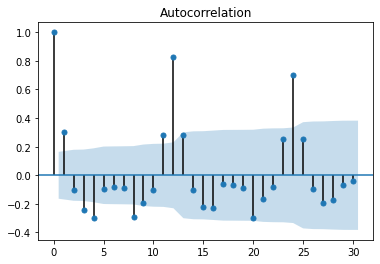

In [ ]:
plot_acf(t_s, lags = 30)
plt.show()

In [ ]:
train = cd[:int(0.75*(len(cd)))]
valid = cd[int(0.75*(len(cd))):]

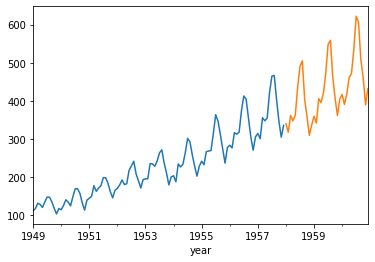

In [ ]:
train['passengers'].plot()
valid['passengers'].plot()

In [ ]:
from pmdarima import auto_arima
model = auto_arima(train, trace = True, suppress_warnings = True, stepwise = True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=959.218, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1002.826, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=996.373, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=991.646, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1001.531, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=988.670, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=983.832, Time=0.36 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 10.453 sec

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

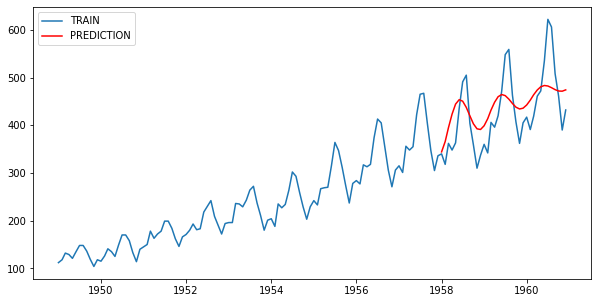

In [ ]:
forecast = model.predict(n_periods = len(valid))
forecast = pd.DataFrame(forecast, index = valid.index, columns = ['Prediction'])

plt.figure(figsize = (10, 5))
plt.plot(cd.passengers, label = 'TRAIN')
plt.plot(forecast, label = 'PREDICTION', color = 'red')
plt.legend()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def evaluate_forecast(y, pred):
    results = pd.DataFrame({'r_square': r2_score(y, pred), }, index = [0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['mean_square_error'] = mean_squared_error(y, pred)
    results['rmse'] = np.sqrt(results['mean_square_error'])
    return results

### Forecast quality scoring metrics

__R squared__: coefficient of determination (it can be interpreted as a percentage of variance explained by the model), (-inf, 1] 
- sklearn.metrics.r2_score

__Mean Absolute Error__: it is an interpretable metric because it has the same unit of measurement as the initial series, [0, +inf)
- sklearn.metrics.mean_absolute_error

__Mean Squared Error__: most commonly used, gives higher penalty to big mistakes and vise versa, [0, +inf)
- sklearn.metrics.mean_squared_error


__Root Mean Square Error__:
- RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

- From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.

- On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations

In [ ]:
evaluate_forecast(valid, forecast)

,r_square,mean_absolute_error,mean_square_error,rmse
0,0.427069,49.488276,3505.366329,59.206134
